In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
df=pd.read_csv('/content/hotel.csv.csv');
print(df.shape)
print(df.info())
print(df.tail(15));
print(df.isnull().sum())
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)
print(df.isnull().sum())
df['phone-number']=df['phone-number'].str.replace('-','').astype("int")
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df.head()
df.describe()
df.describe(include=object)
for i in df.describe(include=object).columns:
    print(i);
    print(df[i].unique())

(9865, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9865 entries, 0 to 9864
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           9865 non-null   object 
 1   is_canceled                     9865 non-null   int64  
 2   lead_time                       9865 non-null   int64  
 3   arrival_date_year               9865 non-null   int64  
 4   arrival_date_month              9865 non-null   object 
 5   arrival_date_week_number        9865 non-null   int64  
 6   arrival_date_day_of_month       9865 non-null   int64  
 7   stays_in_weekend_nights         9865 non-null   int64  
 8   stays_in_week_nights            9865 non-null   int64  
 9   adults                          9865 non-null   int64  
 10  children                        9865 non-null   float64
 11  babies                          9865 non-null   int64  
 12  meal                   

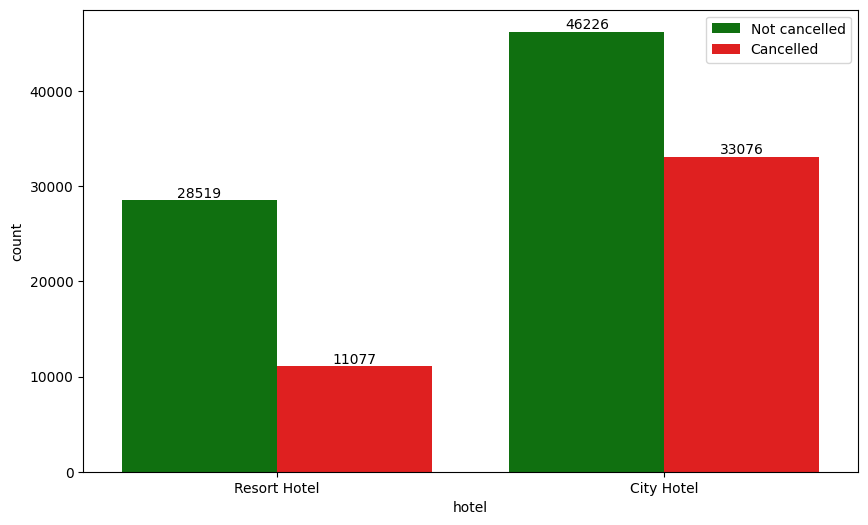

In [ ]:
plt.figure(figsize=(10,6))
# 'hotel' is used for x-axis, and 'is_canceled' becomes the hue
ax = sns.countplot(x='hotel',hue='is_canceled', data=df, palette=["green","red"])
for i in ax.containers:
    ax.bar_label(i);

legend_labels=["Not cancelled","Cancelled"];
ax.legend(labels=legend_labels)
plt.show()

*Scenarios of cancellation Hotelwise*


*   City Hotel has most number of cancellation rate





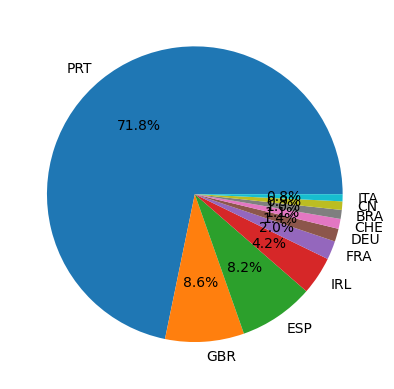

In [ ]:
df4=df[df['is_canceled']==1];
top10=df4['country'].value_counts()[:10];
plt.pie(top10,labels=top10.index,autopct='%1.1f%%')
plt.show()

*Cancellation CountryWise*
* Portugal has highest cancellation percentage

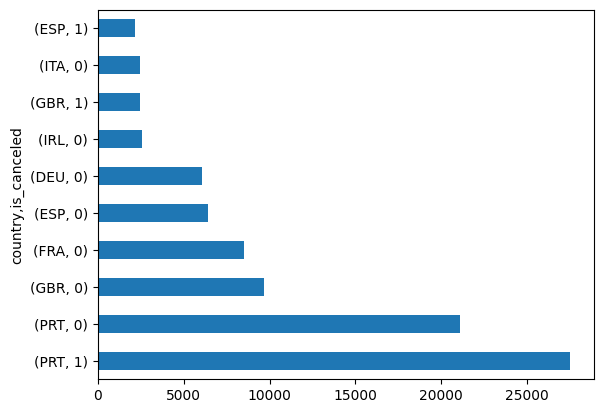

In [ ]:
df.groupby(['country'])['is_canceled'].value_counts().sort_values(ascending=False)[:10].plot(kind='barh');


* Top 10 data by Countries in terms of Stayed & Cancellation Scenario




reservation_status_date
2014-11-18     0.000000
2015-01-01    58.950000
2015-01-02     9.633750
2015-01-18     0.000000
2015-01-22    84.470000
                ...    
2017-01-06    43.000000
2017-01-07    76.750000
2017-01-10    40.878571
2017-01-11    34.090000
2017-01-12    33.310000
Name: adr, Length: 626, dtype: float64
Series([], Name: adr, dtype: float64)


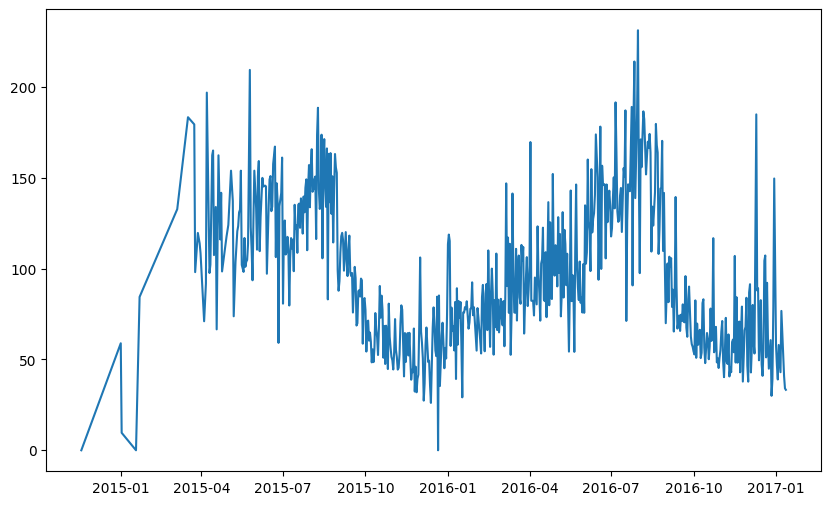

In [ ]:
resort=df[df['hotel']=='Resort Hotel'];
city=df[df['hotel']=='City Hotel'];
special = df[df['is_canceled']==1];
res=resort.groupby(['reservation_status_date'])['adr'].mean()
cit=city.groupby(['reservation_status_date'])['adr'].mean()
print(res)
print(cit)
plt.figure(figsize=(10,6))
plt.plot(res,label='Resort')
plt.plot(cit,label='City')


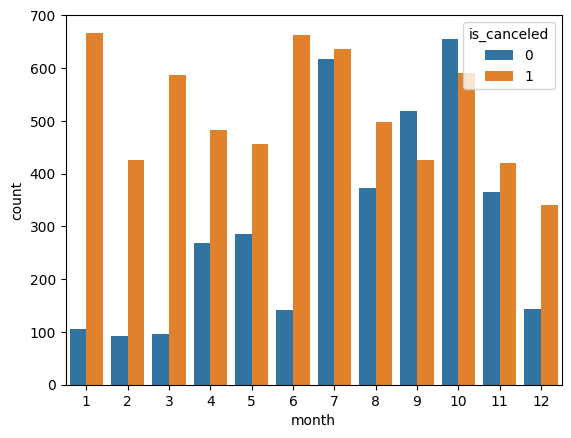

In [ ]:
df['month']=df['reservation_status_date'].dt.month;
abc=special.groupby(['month'])['is_canceled'].value_counts();
sns.countplot(x='month',hue='is_canceled',data=df)
plt.show()

*January has most numbers of cancellation*

<ipython-input-19-57bd1432b890>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='adr', data=monthly_adr_sum,palette='Set2_r')


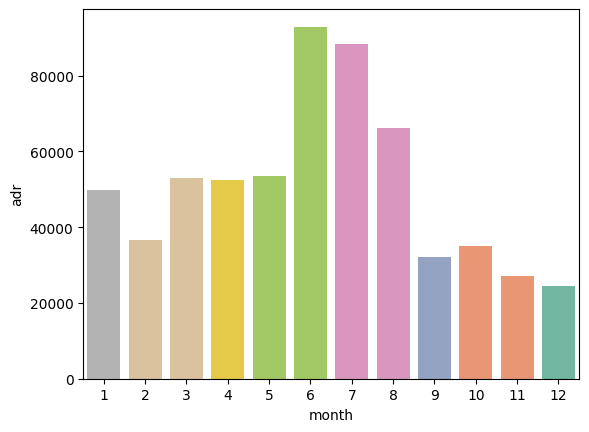

In [ ]:
# Calculate the sum of 'adr' for each month where 'is_canceled' is 1
monthly_adr_sum = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()

sns.barplot(x='month', y='adr', data=monthly_adr_sum,palette='Set2_r')
plt.show()

*Month 1 January has highest ADR*

<ipython-input-23-97bb8f525900>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='adr', y='is_canceled', data=df, palette='Set2')


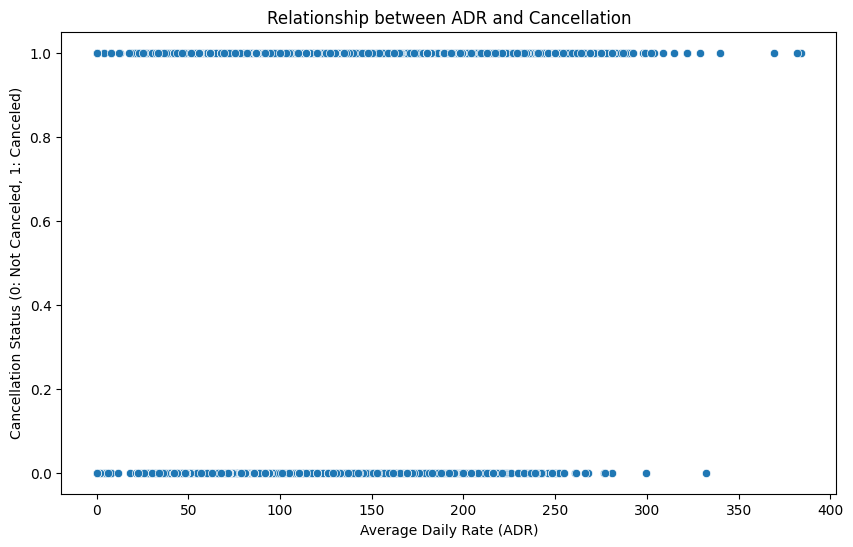

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='adr', y='is_canceled', data=df, palette='Set2')
plt.xlabel('Average Daily Rate (ADR)')
plt.ylabel('Cancellation Status (0: Not Canceled, 1: Canceled)')
plt.title('Relationship between ADR and Cancellation')
plt.show()

*Cancellation incresed with increasing ADR*